# Compare_matrix_factorization

In [1]:
from pathlib import Path
import sys
import os.path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

import json

from pymodulon.util import explained_variance
from pymodulon.imodulondb import imdb_gene_presence

%matplotlib inline
%config  InlineBackend.figure_format = 'png'

sns.set_style('whitegrid')

In [2]:
biocyc_info = pd.read_csv('../Data/biocyc_info.txt', sep="\t")

In [3]:
def map_accession_to_gene_name(df, biocyc_info):

    # Reset index if 'Accession' is the index, and rename the column
    if df.index.name == 'Accession' or df.index.name is None:
        df = df.reset_index()
        df.rename(columns={'index': 'Accession'}, inplace=True)
        
    # Merge with biocyc_info to map 'Accession' to 'Gene Name'
    merged_df = df.merge(biocyc_info[['Accession', 'Gene Name']], on='Accession', how='left')

    # Identify rows with NaN 'Gene Name'
    removed_indices = merged_df[merged_df['Gene Name'].isna()]['Accession'].tolist()

    # Print the original indices that were removed
    print("Original indices removed due to NaN 'Gene Name':", removed_indices)

    # Set 'Gene Name' as the new index and drop the 'Accession' column
    merged_df.set_index('Gene Name', inplace=True)
    merged_df.drop(columns=['Accession'], inplace=True)

    # Remove rows with NaN as index
    merged_df = merged_df[merged_df.index.notna()]
    
    return merged_df

## Read All Gene Presence Matrices

In [4]:
Dictionary_Learning_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Dictionary_Learning_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [5]:
Factor_Analysis_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Factor_Analysis_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [6]:
Fast_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Fast_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [7]:
Incremental_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Incremental_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [8]:
Independent_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Independent_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [9]:
InfoMax_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/InfoMax_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [10]:
NMF_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/NMF_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [11]:
PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [12]:
Sparse_ICA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Sparse_ICA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [13]:
Sparse_Independent_PCA_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/Sparse_Independent_PCA_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [14]:
SparseCoder_Gene_Presence_Matrix = pd.read_csv("./Presence_Matrices/SparseCoder_Gene_Presence_Matrix.csv", index_col=0).astype(int)

In [15]:
RegulonDB_Gene_Presence_Matrix = pd.read_csv("../Data/RegulonDB_TRN_C_and_S.csv", index_col=0).astype(int)

## Map to gene name

In [16]:
Dictionary_Learning_Gene_Presence_Matrix = map_accession_to_gene_name(Dictionary_Learning_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [17]:
Factor_Analysis_Gene_Presence_Matrix = map_accession_to_gene_name(Factor_Analysis_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [18]:
Fast_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(Fast_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [19]:
Incremental_PCA_Gene_Presence_Matrix = map_accession_to_gene_name(Incremental_PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [20]:
Independent_PCA_Gene_Presence_Matrix = map_accession_to_gene_name(Independent_PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [21]:
InfoMax_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(InfoMax_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [22]:
NMF_Gene_Presence_Matrix = map_accession_to_gene_name(NMF_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [23]:
PCA_Gene_Presence_Matrix = map_accession_to_gene_name(PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [24]:
Sparse_ICA_Gene_Presence_Matrix = map_accession_to_gene_name(Sparse_ICA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [25]:
Sparse_Independent_PCA_Gene_Presence_Matrix = map_accession_to_gene_name(Sparse_Independent_PCA_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [26]:
SparseCoder_Gene_Presence_Matrix = map_accession_to_gene_name(SparseCoder_Gene_Presence_Matrix, biocyc_info)

Original indices removed due to NaN 'Gene Name': []


In [27]:
Dictionary_Learning_Gene_Presence_Matrix = Dictionary_Learning_Gene_Presence_Matrix.loc[
    Dictionary_Learning_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [28]:
Factor_Analysis_Gene_Presence_Matrix = Factor_Analysis_Gene_Presence_Matrix.loc[
    Factor_Analysis_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [29]:
Fast_ICA_Gene_Presence_Matrix = Fast_ICA_Gene_Presence_Matrix.loc[
    Fast_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [30]:
Incremental_PCA_Gene_Presence_Matrix = Incremental_PCA_Gene_Presence_Matrix.loc[
    Incremental_PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [31]:
Independent_PCA_Gene_Presence_Matrix = Independent_PCA_Gene_Presence_Matrix.loc[
    Independent_PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [32]:
InfoMax_ICA_Gene_Presence_Matrix = InfoMax_ICA_Gene_Presence_Matrix.loc[
    InfoMax_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [33]:
NMF_Gene_Presence_Matrix = NMF_Gene_Presence_Matrix.loc[
    NMF_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [34]:
PCA_Gene_Presence_Matrix = PCA_Gene_Presence_Matrix.loc[
    PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [35]:
Sparse_ICA_Gene_Presence_Matrix = Sparse_ICA_Gene_Presence_Matrix.loc[
    Sparse_ICA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [36]:
Sparse_Independent_PCA_Gene_Presence_Matrix = Sparse_Independent_PCA_Gene_Presence_Matrix.loc[
    Sparse_Independent_PCA_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [37]:
SparseCoder_Gene_Presence_Matrix = SparseCoder_Gene_Presence_Matrix.loc[
    SparseCoder_Gene_Presence_Matrix.index.isin(RegulonDB_Gene_Presence_Matrix.index)
]

In [38]:
RegulonDB_Gene_Presence_Matrix = RegulonDB_Gene_Presence_Matrix.loc[
    RegulonDB_Gene_Presence_Matrix.index.isin(SparseCoder_Gene_Presence_Matrix.index)
]

## Negentropy for PCA/ICA/IPCA/sIPCA/Regulon

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def logcosh(x):
    return np.log(np.cosh(x))

def calculate_logcosh_negentropy(column):
    # Normalize the data
    scaler = StandardScaler()
    normalized_column = scaler.fit_transform(column.values.reshape(-1, 1)).flatten()
    
    # Calculate the log-cosh of the column
    logcosh_values = logcosh(normalized_column)
    
    # Calculate the expected value (mean) of the log-cosh values
    mean_logcosh = np.mean(logcosh_values)
    
    # Calculate the expected value of the log-cosh for a standard Gaussian
    mean_logcosh_gaussian = np.mean(logcosh(np.random.randn(10000)))
    
    # Negentropy is the difference between these two expectations
    negentropy = mean_logcosh - mean_logcosh_gaussian
    return negentropy

def negentropy_per_column(df):
    negentropy_values = []
    for column in df.columns:
        negentropy = calculate_logcosh_negentropy(df[column]) * -1
        negentropy_values.append(negentropy)
    return np.array(negentropy_values)

def calculate_average_negentropy(dataframes_dict):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the negentropy for each column
        negentropy_values = negentropy_per_column(df)
        
        # Calculate the average negentropy
        average_negentropy = np.mean(negentropy_values)
        
        # Append the result as a tuple (method name, average negentropy)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), abs(average_negentropy)))
    
    # Convert the results into a DataFrame
    negentropy_df = pd.DataFrame(results, columns=['Method', 'Average_Negentropy'])
    negentropy_df.set_index('Method', inplace=True)
    
    return negentropy_df

In [40]:
dataframes_dict = {
    "PCA_Gene_Presence_Matrix": PCA_Gene_Presence_Matrix,
    "Incremental_PCA_Gene_Presence_Matrix": Incremental_PCA_Gene_Presence_Matrix,
    "Independent_PCA_Gene_Presence_Matrix": Independent_PCA_Gene_Presence_Matrix,
    "Sparse_Independent_PCA_Gene_Presence_Matrix": Sparse_Independent_PCA_Gene_Presence_Matrix,
    "Fast_ICA_Gene_Presence_Matrix": Fast_ICA_Gene_Presence_Matrix,
    "InfoMax_ICA_Gene_Presence_Matrix": InfoMax_ICA_Gene_Presence_Matrix,
    "Sparse_ICA_Gene_Presence_Matrix": Sparse_ICA_Gene_Presence_Matrix,
    "NMF_Gene_Presence_Matrix": NMF_Gene_Presence_Matrix,
    "Factor_Analysis_Gene_Presence_Matrix": Factor_Analysis_Gene_Presence_Matrix,
    "Dictionary_Learning_Gene_Presence_Matrix": Dictionary_Learning_Gene_Presence_Matrix,
    "SparseCoder_Gene_Presence_Matrix": SparseCoder_Gene_Presence_Matrix,
    "RegulonDB_Gene_Presence_Matrix":RegulonDB_Gene_Presence_Matrix
}

# Calculate the average negentropy for each DataFrame and return the result as a DataFrame
negentropy_df = calculate_average_negentropy(dataframes_dict)

In [41]:
negentropy_df

,Average_Negentropy
Method,
PCA,0.301420
Incremental_PCA,0.300274
Independent_PCA,0.298308
Sparse_Independent_PCA,0.300310
Fast_ICA,0.327462
InfoMax_ICA,0.268507
Sparse_ICA,0.324952
NMF,0.288761
Factor_Analysis,0.296390


## Mutual Information

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import mutual_info_score

# Calculate mutual information scores
def calculate_mutual_information(df):
    mi_scores = []
    for col in df.columns:
        for col2 in df.columns:
            if col != col2:
                mi_scores.append(mutual_info_score(df[col], df[col2]))
    return np.array(mi_scores)

In [43]:
def calculate_average_mutual_information(dataframes_dict):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the mutual information scores for each pair of columns
        mi_scores = calculate_mutual_information(df)
        
        # Calculate the average mutual information
        average_mi = np.mean(mi_scores)
        
        # Append the result as a tuple (method name, average mutual information)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), average_mi))
    
    # Convert the results into a DataFrame
    mi_df = pd.DataFrame(results, columns=['Method', 'Mutual_Information'])
    mi_df.set_index('Method', inplace=True)
    
    return mi_df

In [44]:
mutual_information_df = calculate_average_mutual_information(dataframes_dict)

In [45]:
mutual_information_df

,Mutual_Information
Method,
PCA,0.000646
Incremental_PCA,0.000645
Independent_PCA,0.000403
Sparse_Independent_PCA,0.000309
Fast_ICA,0.000042
InfoMax_ICA,0.003200
Sparse_ICA,0.000053
NMF,0.000640
Factor_Analysis,0.000734


## Sparsity

In [46]:
def calculate_sparsity_ratio(df, threshold=0):
    if threshold == 0:
        zero_elements = (df == 0).sum().sum()
    else:
        zero_elements = (np.abs(df) < threshold).sum().sum()
    total_elements = df.size
    sparsity_ratio = zero_elements / total_elements
    return sparsity_ratio

In [47]:
def calculate_average_sparsity_ratio(dataframes_dict, threshold=0):
    # Create an empty list to store the results
    results = []

    for method_name, df in dataframes_dict.items():
        # Calculate the sparsity ratio for the DataFrame
        sparsity_ratio = calculate_sparsity_ratio(df, threshold=threshold)
        
        # Append the result as a tuple (method name, sparsity ratio)
        results.append((method_name.replace('_Gene_Presence_Matrix', ''), sparsity_ratio))
    
    # Convert the results into a DataFrame
    sparsity_df = pd.DataFrame(results, columns=['Method', 'Sparsity_Ratio'])
    sparsity_df.set_index('Method', inplace=True)
    
    return sparsity_df

In [48]:
sparsity_ratio_df = calculate_average_sparsity_ratio(dataframes_dict, threshold=0)

In [49]:
sparsity_ratio_df

,Sparsity_Ratio
Method,
PCA,0.989809
Incremental_PCA,0.989745
Independent_PCA,0.989317
Sparse_Independent_PCA,0.990660
Fast_ICA,0.996462
InfoMax_ICA,0.984246
Sparse_ICA,0.995702
NMF,0.988293
Factor_Analysis,0.992421


In [50]:
Numerical_Properties = pd.concat([negentropy_df, mutual_information_df, sparsity_ratio_df], axis=1)

In [51]:
Numerical_Properties

,Average_Negentropy,Mutual_Information,Sparsity_Ratio
Method,,,
PCA,0.301420,0.000646,0.989809
Incremental_PCA,0.300274,0.000645,0.989745
Independent_PCA,0.298308,0.000403,0.989317
Sparse_Independent_PCA,0.300310,0.000309,0.990660
Fast_ICA,0.327462,0.000042,0.996462
InfoMax_ICA,0.268507,0.003200,0.984246
Sparse_ICA,0.324952,0.000053,0.995702
NMF,0.288761,0.000640,0.988293
Factor_Analysis,0.296390,0.000734,0.992421


In [52]:
Numerical_Properties.index = Numerical_Properties.index.str.replace('_', ' ')

In [53]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def plot_average_negentropy(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot for Average_Negentropy
    ax.bar(df.index, df['Average_Negentropy'], color='#B999C8')
    
    # Set the x-tick positions and labels to the method names
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, fontproperties=font_prop, rotation=45, ha="right")
    
    # Apply the font to y-axis ticks
    ax.yaxis.set_tick_params(labelsize=12)  # Optionally, set tick size
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Add title and labels
    ax.set_title("Average Negentropy", fontproperties=font_prop)
    
    # Remove grid lines
    ax.grid(False)
    
    # Add a width=1 box around the plot
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

def plot_mutual_information(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot for Mutual_Information
    ax.bar(df.index, df['Mutual_Information'], color='#F6CD82')
    
    # Set the x-tick positions and labels to the method names
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, fontproperties=font_prop, rotation=45, ha="right")
    
    # Apply the font to y-axis ticks
    ax.yaxis.set_tick_params(labelsize=12)  # Optionally, set tick size
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Add title and labels
    ax.set_title("Mutual Information", fontproperties=font_prop)
    
    # Remove grid lines
    ax.grid(False)
    
    # Add a width=1 box around the plot
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

def plot_sparsity_ratio(df):
    font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot for Sparsity_Ratio
    ax.bar(df.index, df['Sparsity_Ratio'], color='#B8D8A9')
    
    # Set the x-tick positions and labels to the method names
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, fontproperties=font_prop, rotation=45, ha="right")
    
    # Apply the font to y-axis ticks
    ax.yaxis.set_tick_params(labelsize=12)  # Optionally, set tick size
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Add title and labels
    ax.set_title("Sparsity Ratio", fontproperties=font_prop)
    
    # Remove grid lines
    ax.grid(False)
    
    # Add a width=1 box around the plot
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

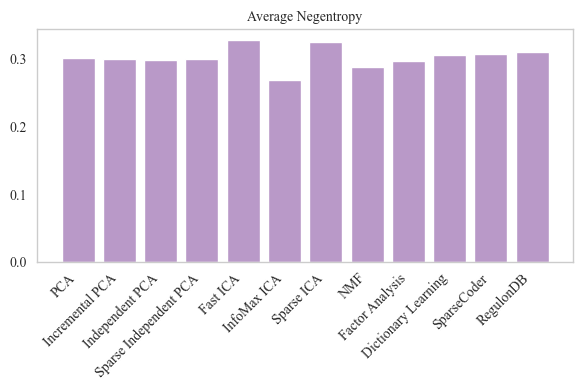

In [54]:
plot_average_negentropy(Numerical_Properties)

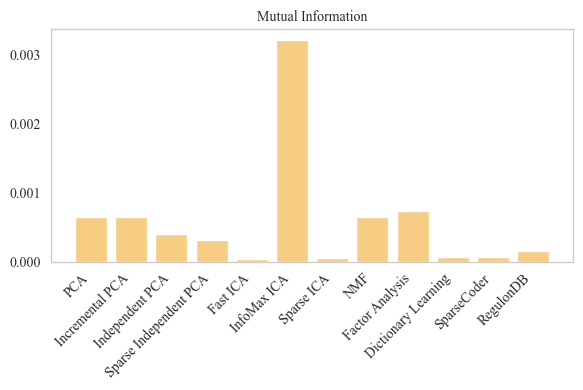

In [55]:
plot_mutual_information(Numerical_Properties)

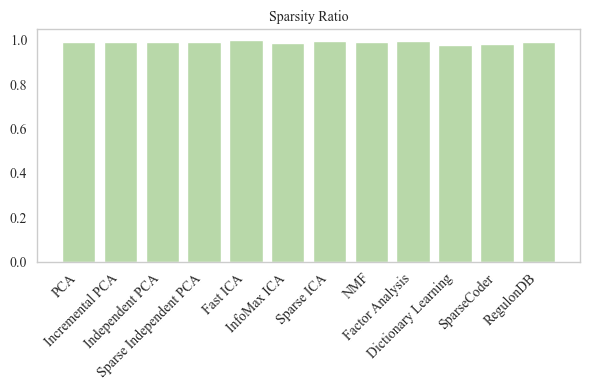

In [56]:
plot_sparsity_ratio(Numerical_Properties)